# Wordcloud
<br>  

### References
- [jqassistant](https://jqassistant.org)
- [py2neo](https://py2neo.org/2021.1/)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
from neo4j import GraphDatabase
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Please set the environment variable "NEO4J_INITIAL_PASSWORD" in your shell 
# before starting jupyter notebook to provide the password for the user "neo4j". 
# It is not recommended to hardcode the password into jupyter notebook for security reasons.

driver = GraphDatabase.driver(uri="bolt://localhost:7687", auth=("neo4j", os.environ.get("NEO4J_INITIAL_PASSWORD")))
driver.verify_connectivity()

In [3]:
def get_cypher_query_from_file(filename):
    with open(filename) as file:
        return ' '.join(file.readlines())

In [4]:
def query_cypher_to_data_frame(filename):
    records, summary, keys = driver.execute_query(get_cypher_query_from_file(filename))
    return pd.DataFrame([r.values() for r in records], columns=keys)

In [5]:
#The following cell uses the build-in %html "magic" to override the CSS style for tables to a much smaller size.
#This is especially needed for PDF export of tables with multiple columns.

In [6]:
%%html
<style>
/* CSS style for smaller dataframe tables. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [7]:
# Main Colormap
main_color_map = 'nipy_spectral'

## Word Cloud

In [8]:
# Query data from graph database
words = query_cypher_to_data_frame("../cypher/Overview/Words_for_universal_Wordcloud.cypher")
words.head(30)

,word
0,main
1,manifest
2,version
3,implementation
4,title
5,automatic
6,module
7,name
8,implementation
9,version


There are 42098 words in the dataset.


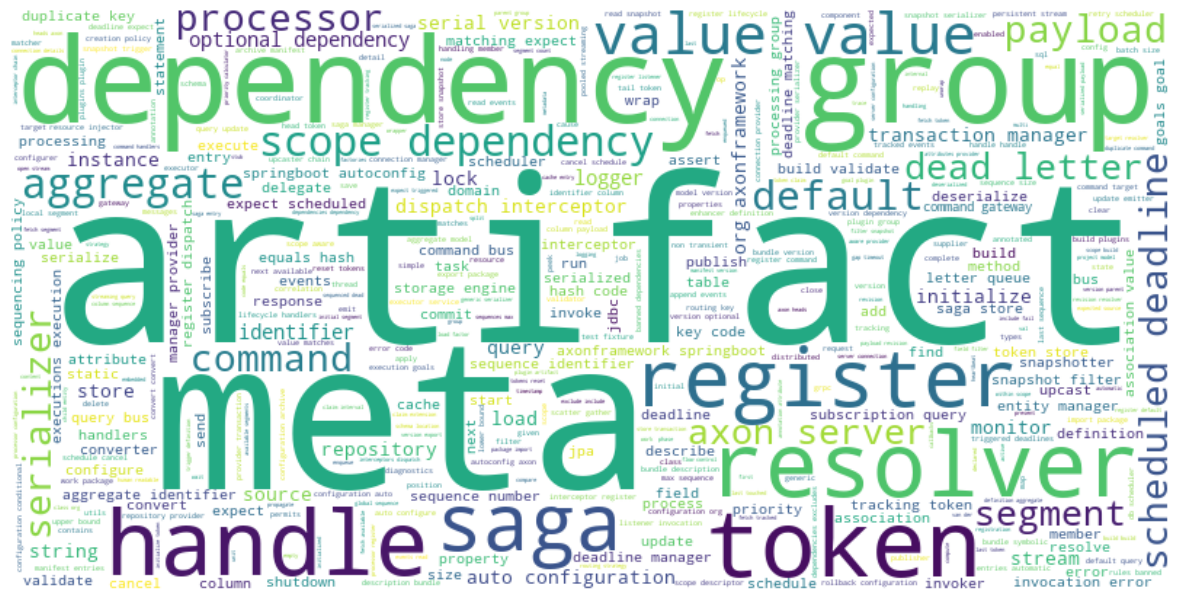

In [9]:
# Join all words into one text separated by spaces
text = " ".join(i for i in words.word)
number_of_words=len(words.word)
print("There are {} words in the dataset.".format(number_of_words))

# Define stop words
stopwords = set(STOPWORDS)
stopwords.update(['builder', 'exception', 'abstract', 'helper', 'util', 'callback', 'factory', 'result',
                 'handler', 'type', 'module', 'name', 'parameter', 'lambda', 'access', 'create', 'message', 
                 'ts', 'js', 'tsx', 'jsx', 'css', 'htm', 'html', 'props', 'use', 'id', 'ref', 'hook', 'event', 
                 'span', 'data', 'context', 'form', 'get', 'set', 'object', 'null', 'new'])

if number_of_words > 0:
    wordcloud = WordCloud(
        width=800, 
        height=400,
        max_words=400, 
        stopwords=stopwords,
        background_color='white', 
        colormap='viridis'
    ).generate(text)

    # Plot the word cloud
    plot.figure(figsize=(15,10))
    plot.imshow(wordcloud, interpolation='bilinear')
    plot.axis("off")
    plot.show()